In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
vibration_data = pd.read_csv('data.csv')


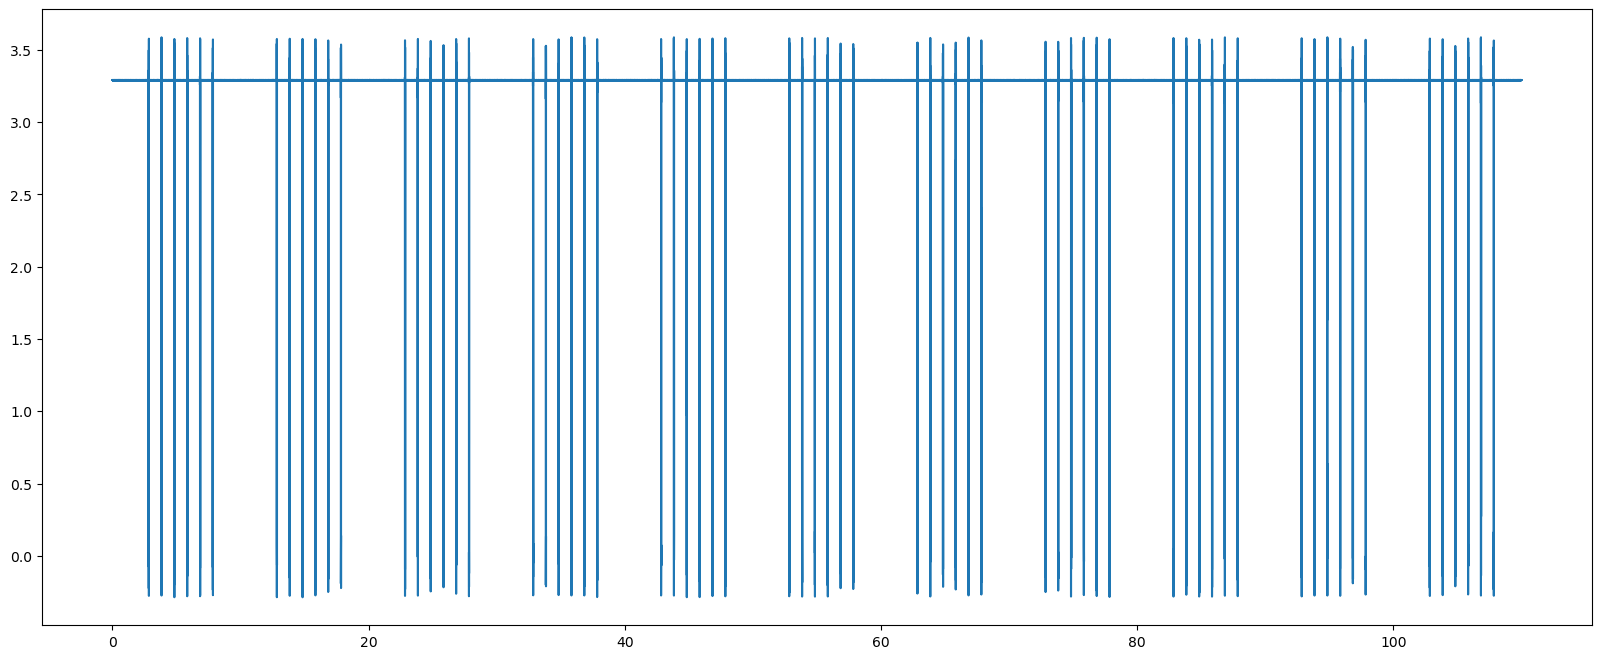

In [8]:
plt.figure(figsize=(20,8))
plt.plot(vibration_data['t'], vibration_data['tensao'])
#Dicionario onde a chave é o tempo e o valor é a tensão
data_dict = {round(vibration_data['t'][i], 4): vibration_data['tensao'][i] for i in range(len(vibration_data['t']))}

In [55]:
delay = round(1/600, 4)
for i in data_dict:
    if data_dict[i] < 0.9:
        print(i, data_dict[i])
       data_dict.keys().index(i)
        break
        
        
        

2.8424 0.137097


AttributeError: 'dict_keys' object has no attribute 'index'

In [48]:
# Exemplo de dicionário: data_dict = {0.0000: 3.3, 0.0010: 0.8, 0.0020: 3.3, 0.0030: 0.9, ...}

start_bit_threshold = 0.9  # Limite para identificar um bit de start
baud_rate = 600  # Baud rate em bits por segundo
delay = round(1 / baud_rate, 4)  # Tempo por bit em segundos

# Para armazenar as posições dos start bits
start_bit_positions = []

# Converte o dicionário em uma lista de tuplas para fácil iteração
data_items = list(data_dict.items())

# Percorre os dados e verifica os start bits
for index in range(len(data_items)):
    time, voltage = data_items[index]

    # Verifica se a tensão está abaixo do limite
    if voltage < start_bit_threshold:
        # Verifica se é precedido por um nível lógico alto
        if index > 0:  # Evita index error
            previous_time, previous_voltage = data_items[index - 1]
            if previous_voltage > start_bit_threshold:
                # Adiciona a posição do start bit (em tempo com 4 casas decimais)
                start_bit_positions.append(round(time, 4))
                print(f"Start bit encontrado na posição {round(time, 4)} (tensão: {voltage}).")

# Imprimindo as posições dos start bits
print("Tempos dos start bits:", start_bit_positions)

# Se você precisar das posições em termos de índice
start_bit_indices = [index for index, (time, voltage) in enumerate(data_items) if round(time, 4) in start_bit_positions]
print("Índices dos start bits:", start_bit_indices)


Start bit encontrado na posição 2.8424 (tensão: 0.137097).
Start bit encontrado na posição 2.8474 (tensão: 0.596837).
Start bit encontrado na posição 2.8508 (tensão: -0.225125).
Start bit encontrado na posição 3.8424 (tensão: -0.274921).
Start bit encontrado na posição 3.8507 (tensão: -0.076021).
Start bit encontrado na posição 4.8424 (tensão: -0.252518).
Start bit encontrado na posição 4.8474 (tensão: -0.281507).
Start bit encontrado na posição 4.854 (tensão: -0.082424).
Start bit encontrado na posição 5.8423 (tensão: 0.834188).
Start bit encontrado na posição 5.8474 (tensão: -0.269829).
Start bit encontrado na posição 5.8507 (tensão: -0.277031).
Start bit encontrado na posição 6.8423 (tensão: 0.460615).
Start bit encontrado na posição 6.8474 (tensão: -0.222558).
Start bit encontrado na posição 6.8507 (tensão: -0.273549).
Start bit encontrado na posição 6.854 (tensão: -0.271555).
Start bit encontrado na posição 7.8423 (tensão: 0.179719).
Start bit encontrado na posição 7.8507 (tensão:

In [41]:
low_threshold = 0.9
high_threshold =2.1
for i in range(1, 15):
    current_time = round(2.8424 + delay * i, 4)
    value = data_dict.get(current_time, f"Chave {current_time} não encontrada")
    if isinstance(value, str):
        print(value)  # Exibe a mensagem de erro
    else:
        # Verifica o sinal lógico
        if value < low_threshold:
            print(f"{current_time}: Tensão {value} - Sinal lógico: 0")
        elif value > high_threshold:
            print(f"{current_time}: Tensão {value} - Sinal lógico: 1")
        else:
            print(f"{current_time}: Tensão {value} - Sinal lógico: Indeterminado")

2.8441: Tensão 0.010311 - Sinal lógico: 0
2.8458: Tensão 3.39043 - Sinal lógico: 1
2.8475: Tensão -0.137086 - Sinal lógico: 0
2.8492: Tensão 3.189352 - Sinal lógico: 1
2.8509: Tensão 0.137901 - Sinal lógico: 0
2.8526: Tensão 0.011422 - Sinal lógico: 0
2.8543: Tensão 0.008972 - Sinal lógico: 0
2.856: Tensão 0.019833 - Sinal lógico: 0
2.8577: Tensão 3.214515 - Sinal lógico: 1
2.8594: Tensão 3.292551 - Sinal lógico: 1
2.8611: Tensão 3.289616 - Sinal lógico: 1
2.8628: Tensão 3.290481 - Sinal lógico: 1
2.8645: Tensão 3.290491 - Sinal lógico: 1
2.8662: Tensão 3.289826 - Sinal lógico: 1


In [21]:
#High > 3
#Low < 1.5
#baudrate 600 = 600 bits por segundo entao um bit é transmitido a cada 1/600 segundos
#Escrevi a mensagem OxAA que é 10101010 em binario
data_points = []
index = 0.0000
delay = round(1/600, 4)
for i in range(len(vibration_data['t'])):
    if vibration_data['tensao'][i] < 1.5:
        index = round(vibration_data['t'][i], 4)
        while index < 5.4398:
            data_points.append(data_dict[index])
            index = round(index+delay, 4)
        break


#print(data_dict[0.9782])
#index = round(0.978223+delay, 4)
#print(index)
#print(data_dict[index])




print(data_points)
print(len(data_points))

#faz mais sentido agora mas o resultado nao parece ser a sequencia que eu enviei



    


[0.021024, 0.005116, 4.990707, 0.065997, 4.836741, 0.130451, 5.019885, -0.10333, 4.82135, 4.927409, 4.926917, 4.926177, 4.926145, 4.933897, 4.931444, 4.931453, 4.935779, 4.929656, 4.93267, 4.933763, 4.935754, 4.936152, 4.934624, 4.940669, 4.943104, 4.932045, 4.935154, 4.931727, 4.932804, 4.936354, 4.939419, 4.935094, 4.936057, 4.934601, 4.933071, 4.93536, 4.931224, 4.930958, 4.93417, 4.933055, 4.934364, 4.93682, 4.934585, 4.933755, 4.934026, 4.933169, 4.931834, 4.934094, 4.932165, 4.938445, 4.936162, 4.941107, 4.938075, 4.936915, 4.931444, 4.930844, 4.930019, 4.930667, 4.928413, 4.933461, 4.935504, 4.934185, 4.934199, 4.931129, 4.932267, 4.930027, 4.929631, 4.929688, 4.931407, 4.932568, 4.932187, 4.931677, 4.93138, 4.933469, 4.928063, 4.929401, 4.927419, 4.930524, 4.932249, 4.932471, 4.932354, 4.932793, 4.933362, 4.931245, 4.929053, 4.928681, 4.927375, 4.931281, 4.933547, 4.935405, 4.934407, 4.936272, 4.935448, 4.930617, 4.930066, 4.928866, 4.929937, 4.929593, 4.929728, 4.932532, 4.933

In [25]:
for i in data_points:
    if i < 1.5:
        index = data_points.index(i)
        print(index)

0
1
3
5
7
1176
1177
1179
1181
1183
2352
2353
2355
2357
2359


In [30]:
print(data_points[2350:2365])
# a sequencia lida considerando start e stop bits é 0 01010101 1

[4.934962, 4.943746, 0.052014, 0.004636, 4.93707, 0.021474, 4.943622, -0.020288, 4.962328, 0.038443, 4.864313, 4.923238, 4.924171, 4.926273, 4.926148]


In [7]:
plt.figure(figsize=(20,8))


<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>